In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import print_tree

In [37]:
def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10


In [ ]:
%%sql


In [38]:
x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20  # параметр лямбда для L2-регуляризатора

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = lm * np.eye(N)  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем

X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)

In [40]:

slag = np.dot(X_train.T,X_train) + IL
inv_slag = np.linalg.inv(slag)


w = inv_slag @ X_train.T @ Y_train
Q = np.mean((np.dot(X,w)-y)**2)
print(Q)
print(w)

0.2130271121045397
[ 1.00237126e+01 -2.90672199e-01 -4.96467582e-02  6.86606766e-03
  6.66217415e-02  7.23998805e-03  1.26400883e-01  1.65640906e-02
  6.85487220e-02 -1.55230849e-02 -9.62629625e-02  1.14525589e-02
  3.31294826e-02 -4.11092271e-03 -5.45421684e-03  7.49255455e-04
  4.80511033e-04 -7.27386114e-05 -2.19025131e-05  3.60499657e-06
  4.07540980e-07 -7.20124617e-08]


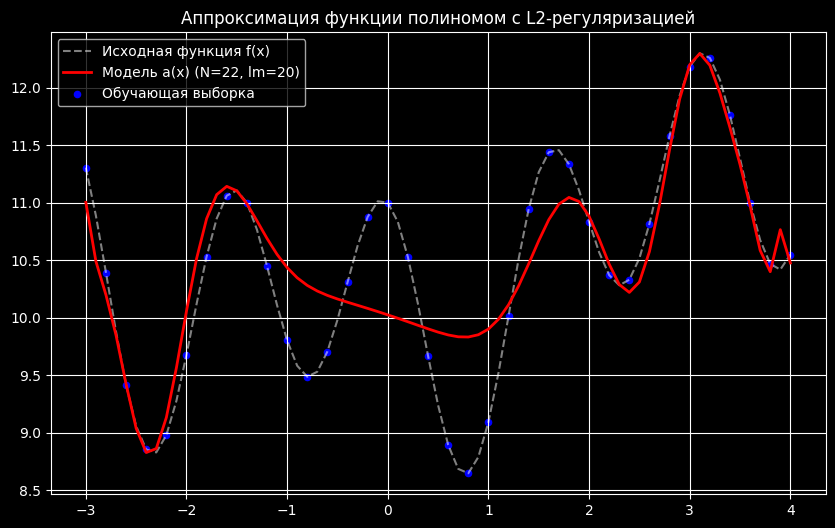

In [46]:


# 1. Считаем предсказания модели для всей сетки x
# (Используем w_vector, если w уже превращен в список)
w_vec = np.array(w)
y_pred = X @ w_vec

# 2. Рисуем
plt.figure(figsize=(10, 6))

# Рисуем исходную функцию (пунктиром)
plt.plot(x, y, label='Исходная функция f(x)', color='white', linestyle='--', alpha=0.5)

# Рисуем нашу аппроксимацию (модель a(x))
plt.plot(x, y_pred, label=f'Модель a(x) (N={N}, lm={lm})', color='red', linewidth=2)

# Отметим точки, на которых модель училась
plt.scatter(x[::2], y[::2], color='blue', s=20, label='Обучающая выборка')

plt.title('Аппроксимация функции полиномом с L2-регуляризацией')
plt.legend()
plt.grid(True)
plt.show()

Задача 2.5-9

In [109]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv

# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    a = 2 * (model(w,x) - y)
    return a * xv

In [122]:
coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 2 # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)



Qe = np.mean(loss(w,coord_x,coord_y))# начальное значение среднего эмпирического риска
print(Qe)
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

3.07781389315838


In [126]:
for i in range(n_iter):
    k = np.random.randint(0, sz - batch_size)

    X_batch = coord_x[k:k + batch_size]
    Y_batch = coord_y[k:k + batch_size]

    priznak_x =  np.array([[a ** n for n in range(N)] for a in X_batch])
    print(f"{priznak_x.shape=}")
    grad = np.mean(dL(w, X_batch, Y_batch), axis=1)
    w = w - eta * (grad+lm_l2*w)
    sr_er = np.mean(loss(w,X_batch,Y_batch))

    Qe = lm * sr_er + (1 - lm) * Qe


# Q = average_risk(w, S, coord_y)
Q = np.mean(loss(w,coord_x,coord_y))
print(f"{Q=},{Qe=}")


priznak_x.shape=(20, 5)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 5)